In [29]:
%matplotlib inline 

import os
import glob
import numpy as np
import pandas as pd
# from skimage import io 
import rasterio
import fiona
import rasterio.mask
from rasterio.plot import show_hist
# import subprocess as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import datetime

import fiona
import rasterio
import rasterio.mask
import rasterio.plot
from descartes import PolygonPatch
import geopandas as gpd


In [2]:
# paths
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd'

shp = '/home/meganmason/Documents/projects/thesis/maps/map_layers/tuolumne_delineation/corrected_tuolumne_subbasin.shp'

In [3]:
#list of files
# path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/'

flist = glob.glob(path + '/*.tif')
for i,f in enumerate(sorted(flist)):
    print(i,f)

0 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TB20130403_SUPERsnow_depth_3p0m.tif
1 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TB20140407_SUPERsnow_depth_3p0m.tif
2 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TB20150415_SUPERsnow_depth_3p0m.tif
3 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TE20160401_SUPERsnow_depth.tif
4 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TE20170303_SUPERsnow_depth_3p0m.tif
5 /home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TE20180423_SUPERsnow_depth_3p0m.tif


In [ ]:
#micah method
# import random

# start = 2013
# end = 2018
# yrs = range(start, end+1)
# z=0

# plt.figure(figsize = (15, 10))
# fig,axs=plt.subplots(2,3)

# for i in range(len(axs)):
#     for j in range(len(axs[0])):

#         arr=np.random.rand(10, 10)

#         ax = axs[i,j]
#         ax.imshow(arr, cmap = 'Blues')
#         ax.set_title('{}'.format(yrs[z]))
        
#         z+=1

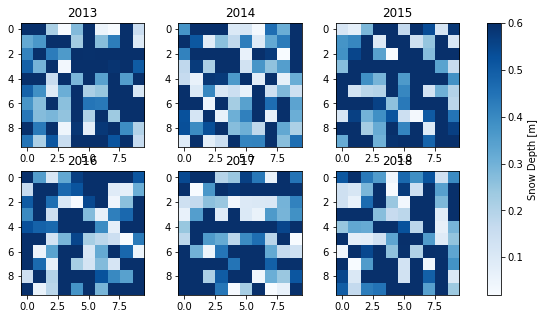

In [19]:
import random

start = 2013
end = 2018
yrs = range(start, end+1)
z=0

# plt.figure(figsize = (50, 20))
fig,axs=plt.subplots(2,3,figsize = (10, 5))


for ax in axs.flat:
    arr=np.random.rand(10, 10)
    im = ax.imshow(arr, cmap = 'Blues', vmax=.6)

    ax.set_title('{}'.format(yrs[z]))
    
    z+=1
    
cb = fig.colorbar(im, ax=list(axs))
cb.set_label('Snow Depth [m]')
# plt.tight_layout()
plt.show()

(1, 16782, 17569)
<class 'numpy.ndarray'>


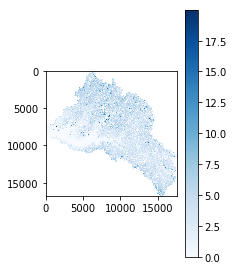

In [88]:
# #WORKS FOR ONE
path = '/home/meganmason/Documents/projects/thesis/data/processing_lidar/depths_3m/peak_sd/TE20170303_SUPERsnow_depth_3p0m.tif'

import fiona
import rasterio
import rasterio.mask

plt.figure(figsize = (10, 10))

with fiona.open(shp, "r") as shapefile:
    geoms = [feature["geometry"] for feature in shapefile]

with rasterio.open(path) as src:
    out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True, nodata=np.nan)
    out_meta = src.meta.copy()

out_meta.update({"driver": "GTiff",
                 "height": out_image.shape[1],
                 "width": out_image.shape[2],
                 "transform": out_transform})

with rasterio.open("test_mask.tif", "w", **out_meta) as dest:
    dest.write(out_image)

    
    ax=plt.subplot(2,3,i)
    
    
    print(out_image.shape)
    print(type(out_image))
    plt.imshow(out_image[0,:,:], cmap='Blues')
    plt.colorbar()
    plt.show()

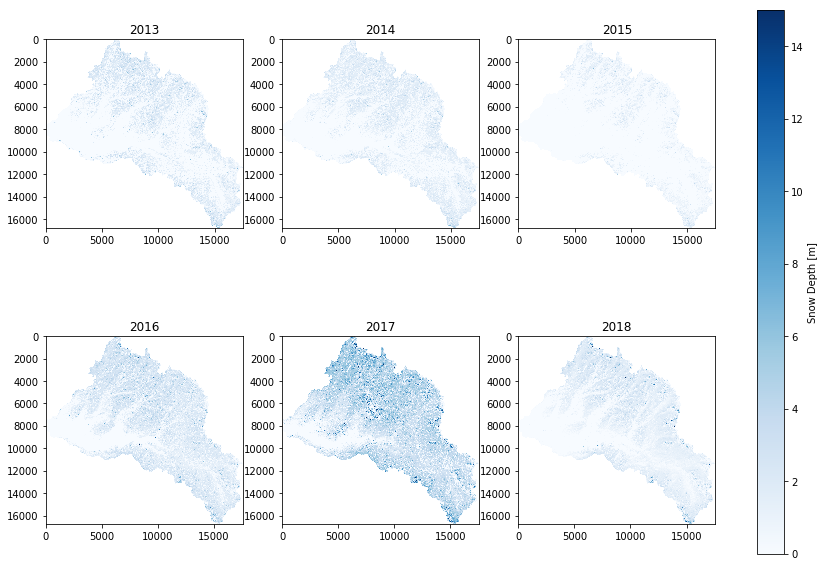

In [86]:
start = 2013
end = 2018
yrs = range(start, end+1)
z=0

fig,axs=plt.subplots(2,3, figsize=(15,10)) 

ax = axs.flat #counting plots


for i,f in enumerate(sorted(flist)):
#     print(f)

    ''' open Tuolumne shapefile '''
    
    with fiona.open(shp, "r") as shapefile:
        geoms = [feature["geometry"] for feature in shapefile]
        
    ''' open lidar tifs
        crops to shapefile
        makes no data NANs '''

    with rasterio.open(f) as src:
        out_image, out_transform = rasterio.mask.mask(src, geoms, crop=True, nodata=np.nan)
#         out_meta = src.meta.copy()

    ''' update meta data on cropped tifs '''

#     out_meta.update({"driver": "GTiff",
#                      "height": out_image.shape[1],
#                      "width": out_image.shape[2],
#                      "transform": out_transform})

#     with rasterio.open("tmp_out/mask.tif", "w", **out_meta) as dest:
#         dest.write(out_image)

    ''' plot settings'''
        
    im = ax[i].imshow(out_image[0,:,:], cmap='Blues', vmax=15) #15 meters max on colorbar

    ax[i].set_title('{}'.format(yrs[z]))
    
    z+=1
    
cb = fig.colorbar(im, ax=list(axs))
cb.set_label('Snow Depth [m]')
# plt.tight_layout()
plt.show()

<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


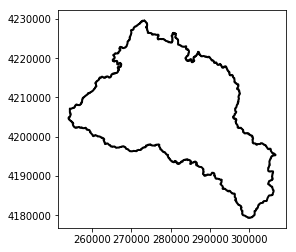

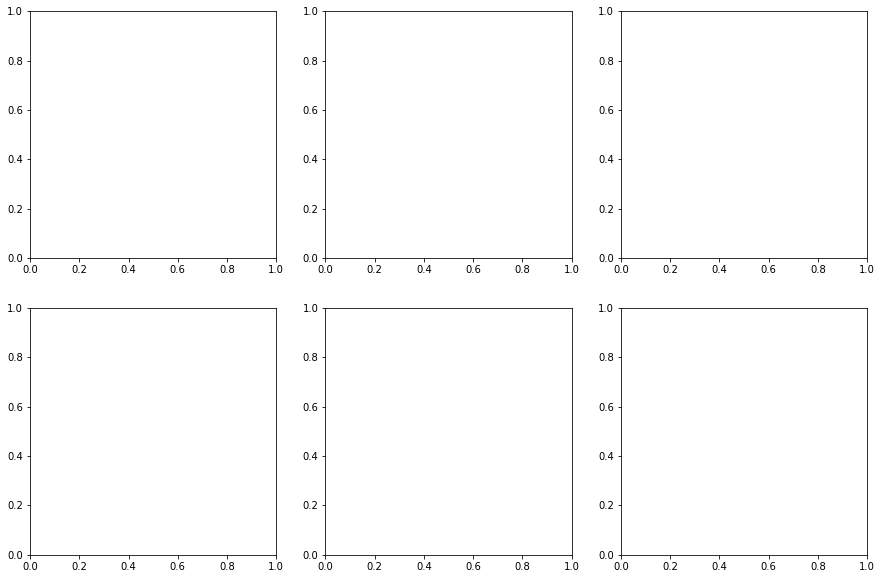

In [85]:
#attempt to put shapefile outline on back of imshow()...no sucess yet

import geopandas as gpd
shape=gpd.read_file(shp)
s=shape.plot(facecolor='none', edgecolor='k', linewidth=2)

fig,axs=plt.subplots(2,3, figsize=(15,10))
for ax in axs.flat:
    print(type(s))
#     im = ax.imshow(s,facecolor='none', edgecolor='k', linewidth=2)